<div style="text-align: right"> 06.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [18]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [19]:
def energie(phi, w): # definiere Funktion
    m=1
    g=9.81
    L=1
    Epot=m*g*L*(1-np.cos(phi)) # berechne E pot
    Ekin=m/2*L*L*w*w # berechen E kin
    Eges=Epot+Ekin # berechne summe
    return Epot,Ekin,Eges



**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

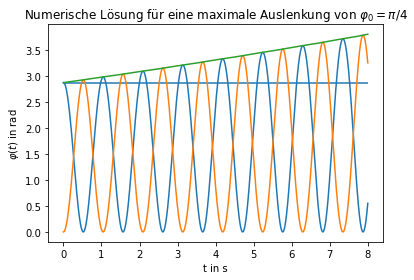

In [20]:
import matplotlib.pyplot as plt

# Alternative Lösung: Berechnung der Energien zu verschiedenen Zeitpunkten über for-Schleife
'''temp= energie(resultsphi[0], resultsw[0])
Epot=[temp[0]]
Ekin=[temp[1]]
Eges=[temp[2]]

for i in range(N):
    temp=energie(resultsphi[i], resultsw[i])
    Epot.append(temp[0])
    Ekin.append(temp[1])
    Eges.append(temp[2])'''

# Alternative Lösung: Berechnung der Energien über list comprehension, siehe https://web.num.math.uni-goettingen.de/python/mop/src/Kontrollstrukturen/kontrollstrukturen_lecture.html?highlight=list%20comprehension
'''Epot = [energie(resultsphi[i], resultsw[i])[0] for i in range(N+1)] 
Ekin = [energie(resultsphi[i], resultsw[i])[1] for i in range(N+1)] 
Eges = [energie(resultsphi[i], resultsw[i])[2] for i in range(N+1)] '''

# schnellster Weg über direkt Zuweisung
resultsw = np.array(resultsw)
resultsphi = np.array(resultsphi)
Epot, Ekin, Eges = energie(resultsphi,resultsw)


fig, ax = plt.subplots()
ax.plot(t, Epot, label='pot. En.')
ax.plot(t, Ekin, label='kin. En.')
ax.plot(t, Eges, label='ges. En.')
ax.hlines(Eges[0], t[0], t[N-1])
ax.set_title(r'Numerische Lösung für eine maximale Auslenkung von $\varphi_0=π/4$')
ax.set_xlabel('t in s')
ax.set_ylabel(r'$\varphi(t)$ in rad')
# ax.plot(t, resultsphi, label='numerische Lösung')
# ax.legend(loc='lower left')
plt.show()

Die Gesamtenergie wird größer, weil sich die Fehler der numerischen Integration mit jedem Schritt aufsummieren. Der Fehler wird kleiner, wenn $\Delta t$ kleiner ist.